In [10]:
import pandas as pd
df_raw_tourism = pd.read_excel(open('data/tourism-data.xlsx', 'rb'), sheet_name='Data') 

In [15]:
df_raw_tourism['Month'] = pd.to_datetime(df_raw_tourism['Month'])
df_raw_tourism['Month'] = df_raw_tourism['Month'].dt.strftime('%Y-%m')
df_raw_tourism_result = df_raw_tourism.groupby('Month').agg({
    'Total tourist arrivals': 'sum'
}).reset_index()
df_raw_tourism_result.head()

,Month,Total tourist arrivals
0,2008-01,64621
1,2008-02,67963
2,2008-03,71623
3,2008-04,62670
4,2008-05,48764


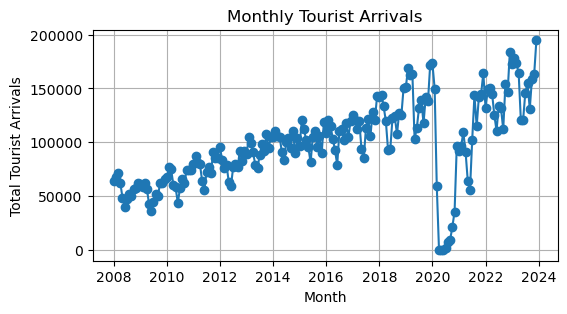

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Sample DataFrame with tourist arrivals data

df_raw_tourism_result['Month'] = pd.to_datetime(df_raw_tourism_result['Month'])
df_raw_tourism_result.set_index('Month', inplace=True)

# Visualize the time series data
plt.figure(figsize=(6, 3))
plt.plot(df_raw_tourism_result.index, df_raw_tourism_result['Total tourist arrivals'], marker='o')
plt.title('Monthly Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Total Tourist Arrivals')
plt.grid(True)
plt.show()


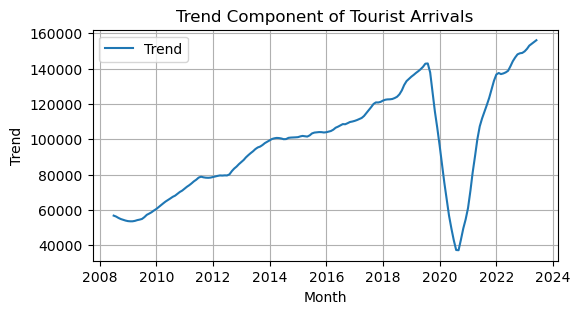

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series into trend, seasonality, and residual components
decomposition = seasonal_decompose(df_raw_tourism_result['Total tourist arrivals'], model='additive')

# Plot the trend component
plt.figure(figsize=(6, 3))
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component of Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Trend')
plt.legend()
plt.grid(True)
plt.show()

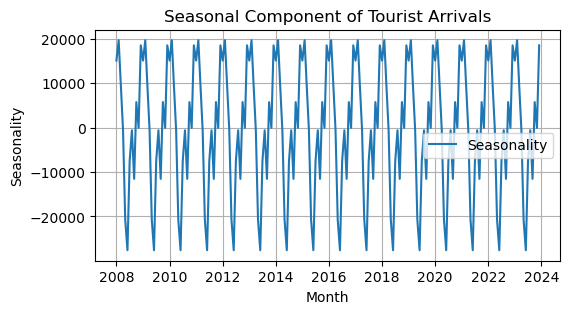

In [19]:
plt.figure(figsize=(6, 3))
plt.plot(decomposition.seasonal, label='Seasonality')
plt.title('Seasonal Component of Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Seasonality')
plt.legend()
plt.grid(True)
plt.show()

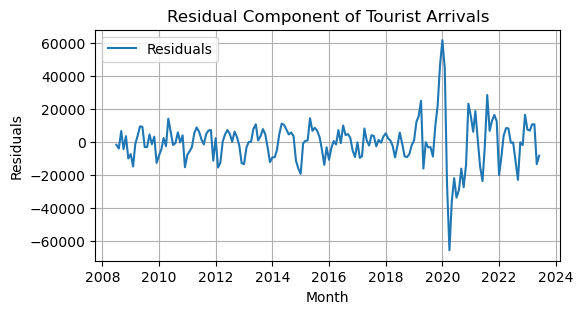

In [21]:
plt.figure(figsize=(6, 3))
plt.plot(decomposition.resid, label='Residuals')
plt.title('Residual Component of Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

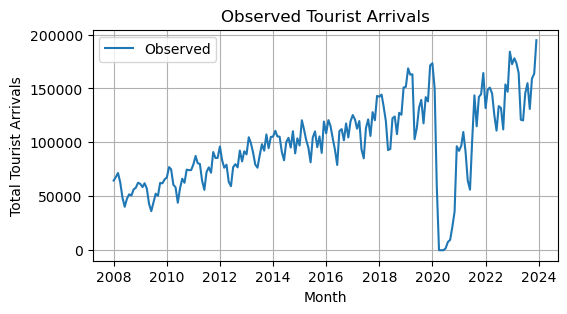

In [22]:
plt.figure(figsize=(6, 3))
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Tourist Arrivals')
plt.xlabel('Month')
plt.ylabel('Total Tourist Arrivals')
plt.legend()
plt.grid(True)
plt.show()